## TASK 1 OASIS 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio

# LOADING DATASET

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/user pc/Downloads/retail_sales_dataset.csv")

# Display first few rows
display(df.head())

# Basic Information about the dataset
print("Dataset Information:")
df.info()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


# DATA HANDLING

In [4]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Data Visualization:

C:\Users\user pc\AppData\Local\Temp\ipykernel_12524\2926194099.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df['Total Amount'], palette="coolwarm")


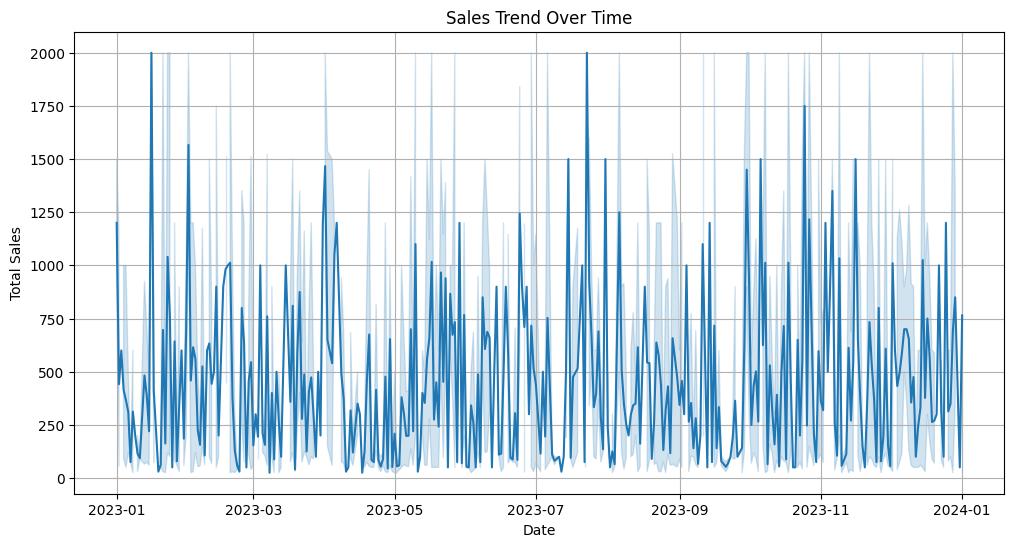

In [6]:

# Time Series Analysis: Sales Trend Over Time
%matplotlib inline
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df['Total Amount'], palette="coolwarm")
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.grid()
    plt.show()

In [7]:
if 'Date' in df.columns:
    df['Month'] = df.index.to_period('M')
    monthly_sales = df.groupby('Month')['Total Amount'].sum()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color="blue")
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Monthly Sales Trend
if 'Date' in df.columns:
    df['Month'] = df.index.to_period('M')
    monthly_sales = df.groupby('Month')['Total Amount'].sum()
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(marker='o')
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.grid()
    plt.show()


Number of Unique Customers: 1000


C:\Users\user pc\AppData\Local\Temp\ipykernel_12524\2637392751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Product Category'], order=df['Product Category'].value_counts().index, palette="Blues")


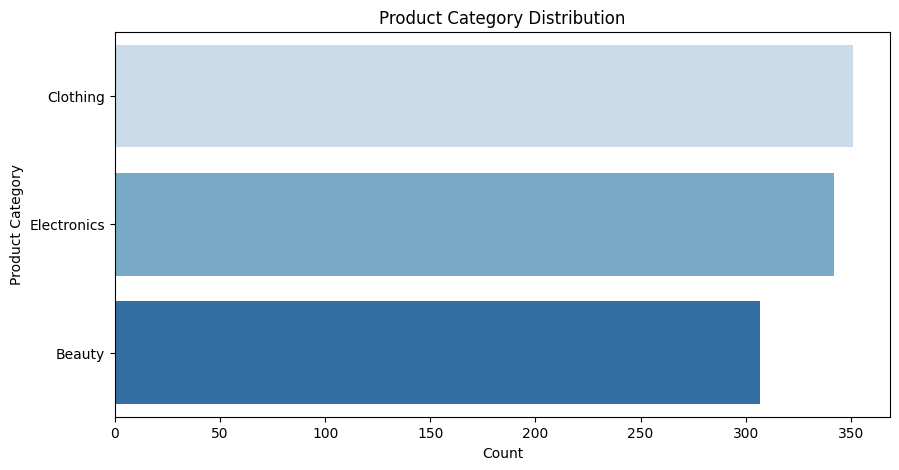

In [9]:
# Customer and Product Analysis

if 'Customer ID' in df.columns:
    print("\nNumber of Unique Customers:", df['Customer ID'].nunique())

if 'Product Category' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['Product Category'], order=df['Product Category'].value_counts().index, palette="Blues")
    plt.title("Product Category Distribution")
    plt.xlabel("Count")
    plt.ylabel("Product Category")
    plt.show()


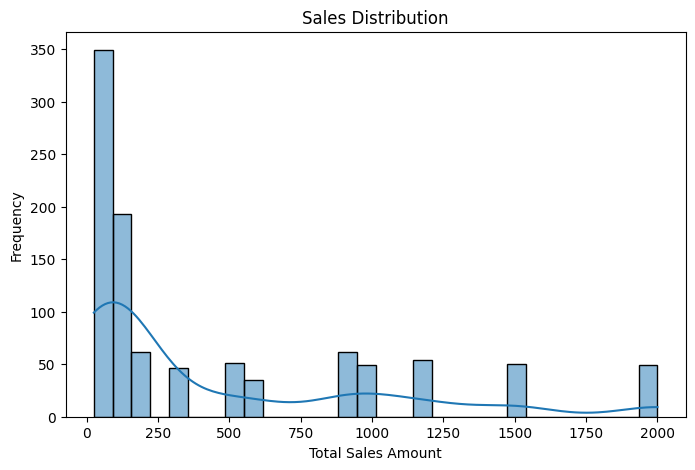

In [10]:
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Amount'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Total Sales Amount")
plt.ylabel("Frequency")
plt.show()

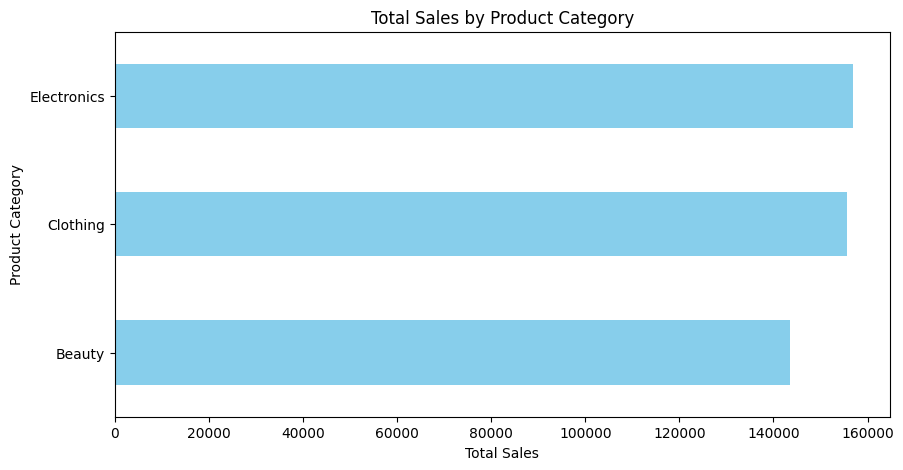

In [11]:
# Sales by Product Category
if 'Product Category' in df.columns:
    category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values()
    plt.figure(figsize=(10, 5))
    category_sales.plot(kind='barh', color='skyblue')
    plt.title("Total Sales by Product Category")
    plt.xlabel("Total Sales")
    plt.ylabel("Product Category")
    plt.show()

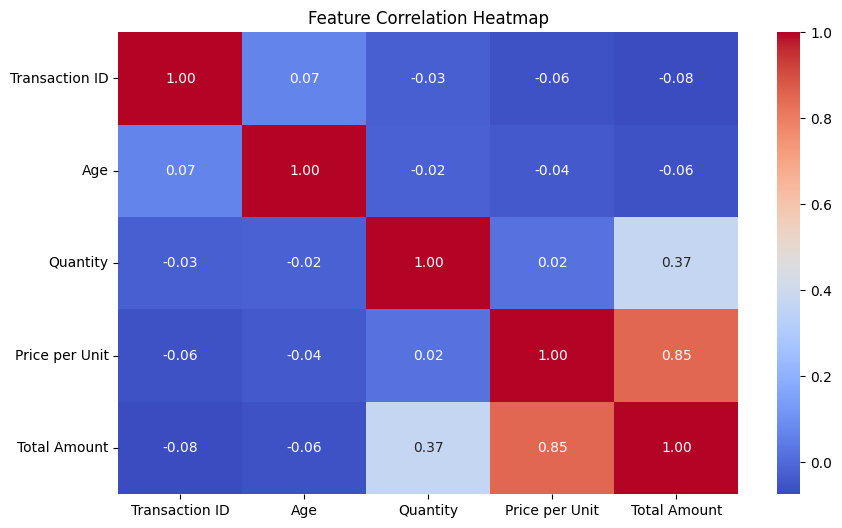

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Check if there are numeric columns available
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

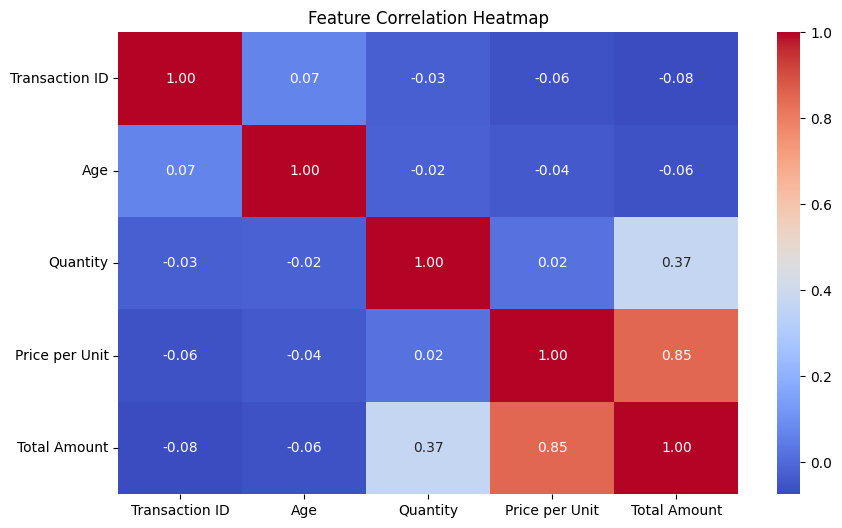

In [13]:
# Correlation Heatmap
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()


C:\Users\user pc\AppData\Local\Temp\ipykernel_12524\3515764889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Total Amount', data=df, palette="viridis")


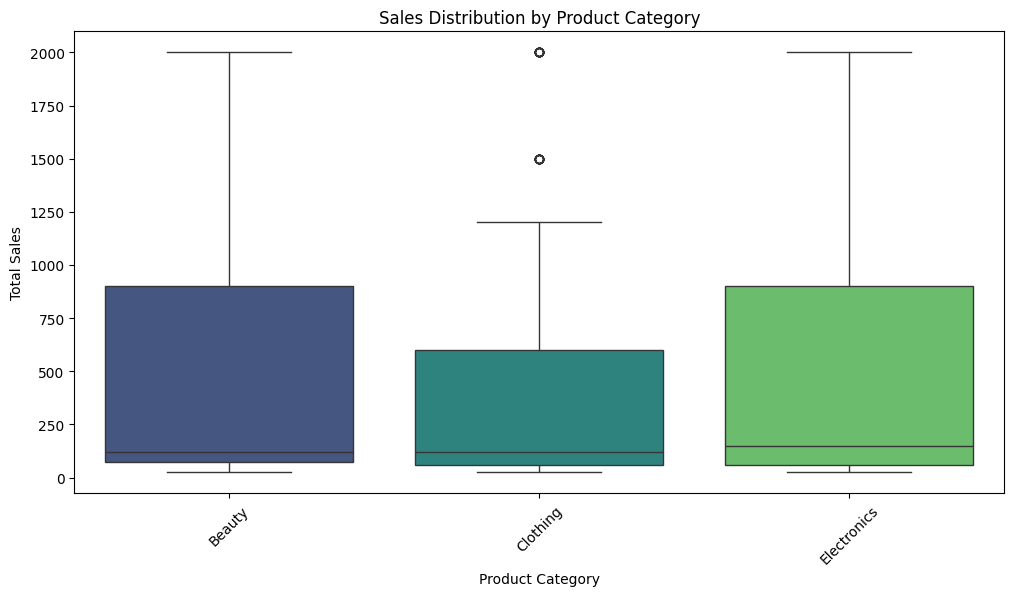

In [14]:
# Boxplot of Sales by Product Category
if 'Product Category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Product Category', y='Total Amount', data=df, palette="viridis")
    plt.title("Sales Distribution by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# Treemap: Product Category and Total Sales
if 'Product Category' in df.columns:
    fig = px.treemap(df, path=['Product Category'], values='Total Amount', title='Sales Breakdown by Product Category', color_continuous_scale="viridis")
    fig.show()


In [17]:
# Scatter Plot: Quantity vs. Total Amount
fig = px.scatter(df, x='Quantity', y='Total Amount', title='Quantity vs Total Sales', color='Product Category')
fig.show()

In [26]:
# Pie Chart with Magma Color Palette
if 'Product Category' in df.columns:
    category_sales = df.groupby('Product Category')['Total Amount'].sum()
    fig = px.pie(
        values=category_sales.values, 
        names=category_sales.index, 
        title='Sales Contribution by Product Category', 
        color_discrete_sequence=px.colors.sequential.Plasma
    )
    fig.show()

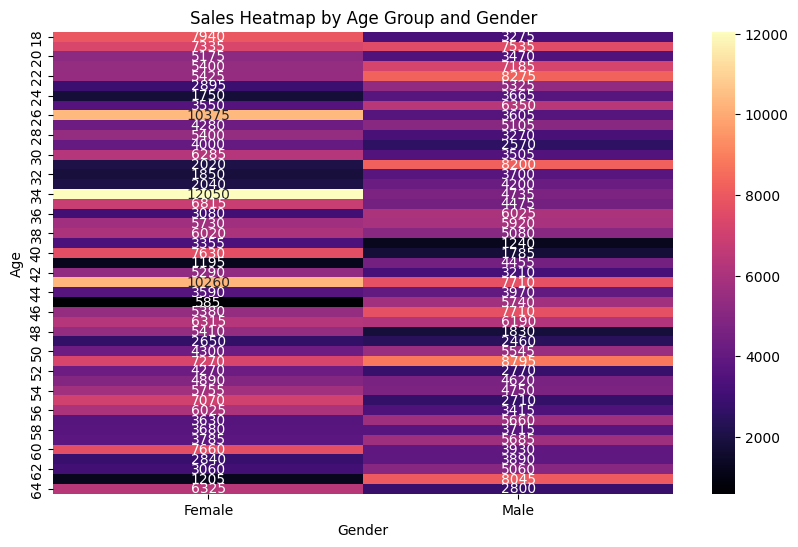

In [18]:
# Heatmap of Sales by Age Group and Gender
if 'Age' in df.columns and 'Gender' in df.columns:
    age_gender_sales = df.pivot_table(values='Total Amount', index='Age', columns='Gender', aggfunc='sum', fill_value=0)
    plt.figure(figsize=(10, 6))
    sns.heatmap(age_gender_sales, cmap='magma', annot=True, fmt='.0f')
    plt.title("Sales Heatmap by Age Group and Gender")
    plt.show()

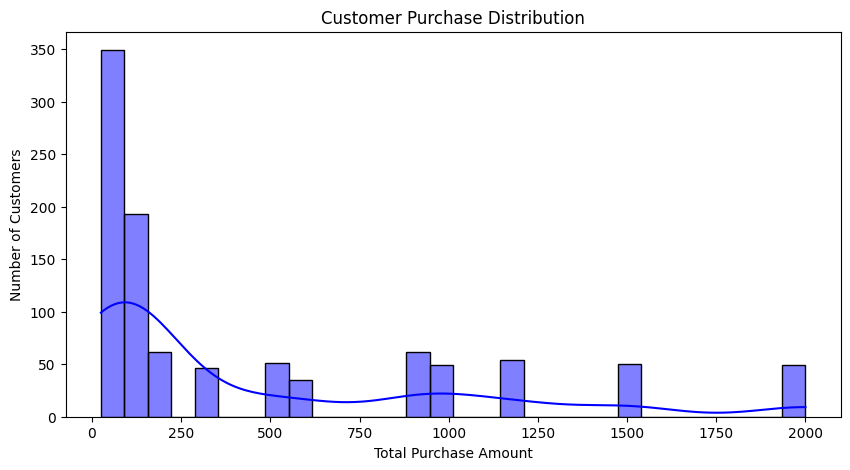

In [19]:
# Advanced Insights: Customer Segmentation
if 'Customer ID' in df.columns:
    customer_sales = df.groupby('Customer ID')['Total Amount'].sum()
    plt.figure(figsize=(10, 5))
    sns.histplot(customer_sales, bins=30, kde=True, color='blue')
    plt.title("Customer Purchase Distribution")
    plt.xlabel("Total Purchase Amount")
    plt.ylabel("Number of Customers")
    plt.show()